## Лабораторная работа 1. Введение в машинное обучение.

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 20 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

### Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучающее (train) и тестовое (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму при оценке модели на тесте. И наоборот, большой размер тестовой выборки ведет к менее шумной оценке качества, однако обученные модели получаются менее точными.

Многие модели классификации предсказывают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). После этого принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$$y(x) = 
\begin{cases}
+1, &\text{если} \; \tilde{y}(x) \geq \theta \\
-1, &\text{если} \; \tilde{y}(x) < \theta
\end{cases}
$$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать на следующих лекциях или, например, [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения этой лабораторной не требуется.

### Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели), в то время как гиперпараметры задаются заранее (например, значение силы регуляризации в линейной модели). Каждая модель, как правило, имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, поэтому для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, далее перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения оптимизируемой метрики). Однако, в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку.

В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.

Для устранения описанной выше проблемы, **можно разбить данные на 3 непересекающихся подвыборки: обучение, валидация и тест**. Валидационную подвыборку используют для сравнения моделей, а тестовую — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.

**Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH)**. 

Существуют различные **схемы кросс-валидации**:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, не стоит забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, предсказывающий победу команды в компьютерной игре Dota2.
 
Более подробно про данные можно почитать на странице первого конкурсного [соревнования](https://www.kaggle.com/t/f2f20fc510f042dfa9751a03c6108805). Целевой признак записан в переменной radiant_win. 

### Обучение классификаторов на вещественных признаках

Загрузите набор данных *train.csv*, *gold.csv* и *lh.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [151]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt

In [152]:
train = pd.read_csv("train.csv")
gold = pd.read_csv("gold.csv")
lh = pd.read_csv("lh.csv")
events = pd.read_csv("events.csv")

Иногда в данных встречаются пропуски. Способ обозначения пропусков либо прописывается в описании к данным, либо на месте пропуска после чтения данных оказывается значение [NaN](https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html). Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "-1". 

**Задание 1** (1 балл) 

Проанализируйте датасет и найдите все признаки, имеющие пропущенные значения (опишите свои наблюдения). 

Предобработайте текущий датасет так, что бы в нём не осталось пропусков (обоснуйте свой выбор метода предобработки).

In [153]:
def find_values(df, value):
    for col in list(df.columns):
        if not df[df[col] == value].empty:
            print(df[df[col] == value].index)
    return df

In [154]:
train = find_values(train, -1)
gold = find_values(gold, -1)
lh = find_values(lh, -1)
events = find_values(events, -1)
print(events.iloc[205])

Int64Index([  205,   240,   406,   433,   544,   969,  1211,  1238,  1314,
             1470,
            ...
            67303, 67396, 67561, 67940, 68160, 68279, 68598, 68679, 68777,
            68852],
           dtype='int64', length=418)
mid            150
event_type       3
from_team     dire
time            -1
Name: 205, dtype: object


1. Добавил ещё events.csv чтобы проверить точно ли я нахожу эти -1 значения, правда там это не пропуски, ведь отсчёт времени идёт от -60
2. Собственно, в наших данных train, gold, lh пропущенных данных нет, нам повезло

В начале мы будем работать только с вещественными признаками. 

Возьмите из *gold.csv* и *lh.csv* данные по 600 секунде для каждого матча и подклейте их к *train.csv* (см. [булево индексирование](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing) и [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html?highlight=join#pandas.DataFrame.join)).

In [155]:
gold_each_10th = gold[9::10]
lh_each_10th = lh[9::10]
train_gold = train.join(gold_each_10th.set_index('mid'), on='mid', rsuffix = '_gold')
train_gold_lh = train_gold.join(lh_each_10th.set_index('mid'), on='mid', rsuffix = '_lh')

In [156]:
train_gold_lh_each_player = train_gold_lh
print(train_gold_lh.shape)
train_gold_lh.head(5)

(24974, 24)


,mid,radiant_won,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,...,player_0_lh,player_1_lh,player_2_lh,player_3_lh,player_4_lh,player_5_lh,player_6_lh,player_7_lh,player_8_lh,player_9_lh
0,0,1,600,3454,5206,2613,4426,5755,4072,3997,...,4,43,3,57,41,34,35,75,2,46
1,1,0,600,2477,5760,3816,4353,5759,7659,5066,...,5,63,14,28,47,49,23,3,30,39
2,2,1,600,3604,1948,8581,4390,2869,3096,2301,...,34,6,69,42,23,6,12,56,13,12
3,4,1,600,3675,4103,5154,3030,2076,3920,3494,...,30,41,45,23,4,26,9,23,37,6
4,5,1,600,4252,2412,2545,4264,2544,4752,5389,...,42,5,16,30,3,42,24,53,12,14


**Задание 2** (1 балл)

Постройте для команд radiant и dire различные агригаты по игрокам на 600 секунде. Опишите какие именно агригаты вы построили и почему.

агригаты -> агрегаты ;)

gold_team_radiant/dire = сумма золота для команды. 

Параметр куда легче воспринимать, чем кто сколько золота имеет, тем более не зная даже героев. Зная героев золото для каждого героя в разный момент времени представляет совершенно разную ценность, но даже пока герой не купил айтемы, оно ничего не стоит, так что по сути золото для каждого игрока для обучения модели не должен быть столь серьёзным параметром в нашем случае, и сумма должна дать куда больше.

max_gold_team_radiant/dire = сколько золота у самого богатого игрока в команде.

Параметр может дать полезную информацию особенно в тех случаях, когда золота в сумме у команд поровну, но сильно важно, как распределено это золото по команде (может один игрок имеет преимущество в несколько тысяч, тогда он может и 1 в 5 выиграть не редко). Опять же, зная информация о ролях и героях каждого игрока, распределние золота дало бы очень ценную информацию для нас, но, не зная этой информации ограничимся лишь информацией о самом богатом игроке. Хотя всё равно золото показывает куда меньше, чем информация о купленный предметах.

lh_team_radiant/dire = сумма ласт хитов для команды

Опять же, это жалкое подобие параметра опыта, который дан на сореве, но не в домашке, т.к. ласт хиты дают информацию о золоте и опыте, по сути, имея инфу о золоте. опыте и килах, информация о ласт хитах уже дана, но не имя ни опыта, ни килов - ласт хиты будут нашей заменой. Зная количества золота на команду и количества опыта можно примерно знать количество килов, что важный параметр, но там только приблизительное число, поэтому не особо охота его считать, но можно было бы

P.S. да, я играл в игры такого жанра, но думая зная больше математики можно было бы найти даже больше классных агрегатов основанных на распределении всех этих штук между игроками

In [157]:
col_list_radiant = list(gold_each_10th)[2:7]
col_list_dire = list(gold_each_10th)[7:]

gold_each_10th.loc[:, ('gold_team_radiant')]= gold_each_10th[col_list_radiant].sum(axis = 1)
gold_each_10th.loc[:, ('gold_team_dire')] = gold_each_10th[col_list_dire].sum(axis = 1)
gold_each_10th.loc[:, ('max_gold_team_radiant')] = gold_each_10th[col_list_radiant].max(axis = 1)
gold_each_10th.loc[:, ('max_gold_team_dire')] = gold_each_10th[col_list_dire].max(axis = 1)
lh_each_10th.loc[:, ('lh_team_radiant')] = lh_each_10th[col_list_radiant].sum(axis = 1)
lh_each_10th.loc[:, ('lh_team_dire')] = lh_each_10th[col_list_dire].sum(axis = 1)

gold_each_10th = gold_each_10th.drop(columns = list(gold_each_10th)[1:12])
lh_each_10th = lh_each_10th.drop(columns = list(lh_each_10th)[1:12])

/home/elephant/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/elephant/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [158]:
train_gold = train.join(gold_each_10th.set_index('mid'), on='mid', rsuffix = '_gold')
train_gold_lh = train_gold.join(lh_each_10th.set_index('mid'), on='mid', rsuffix = '_lh')

Переделал train_gold_lh новые агрегаты и убрал старые значения, что использовались для агрегатов

In [159]:
train_new_parameters = train_gold_lh
train_new_parameters.head()


,mid,radiant_won,gold_team_radiant,gold_team_dire,max_gold_team_radiant,max_gold_team_dire,lh_team_radiant,lh_team_dire
0,0,1,21454,22095,5755,6384,148,192
1,1,0,22165,24536,5760,7659,157,144
2,2,1,21392,15548,8581,5130,174,99
3,4,1,18038,17484,5154,4458,143,101
4,5,1,16017,22041,4264,5389,96,145


Сейчас и далее будем рассматривать следующие алгоритмы:
 - [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
 - [C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
 - [Multi-layer Perceptron Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

**Задание 3** (1.5 балла) 

Для каждого алгоритма выберете один гиперпараметр и подберите его оптимальное значение. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

У какого алгоритма наибольшее среднее значение качества? Наибольший доверительный интервал?

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
# train_gold_lh_each_player - с данными про каждого игрока
# train_new_parameters - с новыми данных про голду и ласт хиты без старых

In [11]:
X = train_new_parameters
log_reg_model = LogisticRegression()
svm_model = sklearn.svm.SVC(kernel = 'rbf')
mlpclassfier_model = MLPClassifier(activation = 'relu', solver = 'adam', alpha = 0.0001)

log_reg_parameters = {'C':[0.0001, 0.1, 1, 10, 100, 10000]}
svm_parameters = {'C':[0.001, 1, 100]}
mlpclassfier_parameters = {'hidden_layer_sizes': [(50,50,50), (50,10), (100,), (10,), (1,)]}
X.sort_values(by=['mid'])
X_train = X.copy()
y_train = X['radiant_won'].copy()
X_train = X_train.drop(columns=['radiant_won', 'mid'])

In [18]:
from sklearn.model_selection import KFold
log_reg_grid = GridSearchCV(log_reg_model, log_reg_parameters, verbose = 10, n_jobs=-1, cv=KFold())
log_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    1.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.1, 1, 10, 100, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [19]:
svm_grid = GridSearchCV(svm_model, svm_parameters, verbose = 10, n_jobs=-1, cv=KFold())
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/elephant/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  1.1min remaining:   33.9s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  1.2min remaining:   18.2s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1, param_grid={'C': [0.001, 1, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [20]:
mlpclassfier_grid = GridSearchCV(mlpclassfier_model, mlpclassfier_parameters, verbose = 10, n_jobs=-1, cv=KFold())
mlpclassfier_grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  1.4min remaining:   16.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
     

In [21]:
def get_mean_std_parameters(grid):
    means = grid.cv_results_['mean_test_score']
    stds = grid.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, grid.cv_results_['params']):
        print("mean %0.3f std (+/-%0.03f) for %r" % (mean, std, params))

get_mean_std_parameters(log_reg_grid)
get_mean_std_parameters(svm_grid)
get_mean_std_parameters(mlpclassfier_grid)

mean 0.652 std (+/-0.004) for {'C': 0.0001}
mean 0.652 std (+/-0.004) for {'C': 0.1}
mean 0.652 std (+/-0.004) for {'C': 1}
mean 0.652 std (+/-0.004) for {'C': 10}
mean 0.652 std (+/-0.004) for {'C': 100}
mean 0.652 std (+/-0.004) for {'C': 10000}
mean 0.520 std (+/-0.004) for {'C': 0.001}
mean 0.652 std (+/-0.003) for {'C': 1}
mean 0.652 std (+/-0.004) for {'C': 100}
mean 0.621 std (+/-0.028) for {'hidden_layer_sizes': (50, 50, 50)}
mean 0.531 std (+/-0.048) for {'hidden_layer_sizes': (50, 10)}
mean 0.545 std (+/-0.040) for {'hidden_layer_sizes': (100,)}
mean 0.531 std (+/-0.018) for {'hidden_layer_sizes': (10,)}
mean 0.520 std (+/-0.005) for {'hidden_layer_sizes': (1,)}


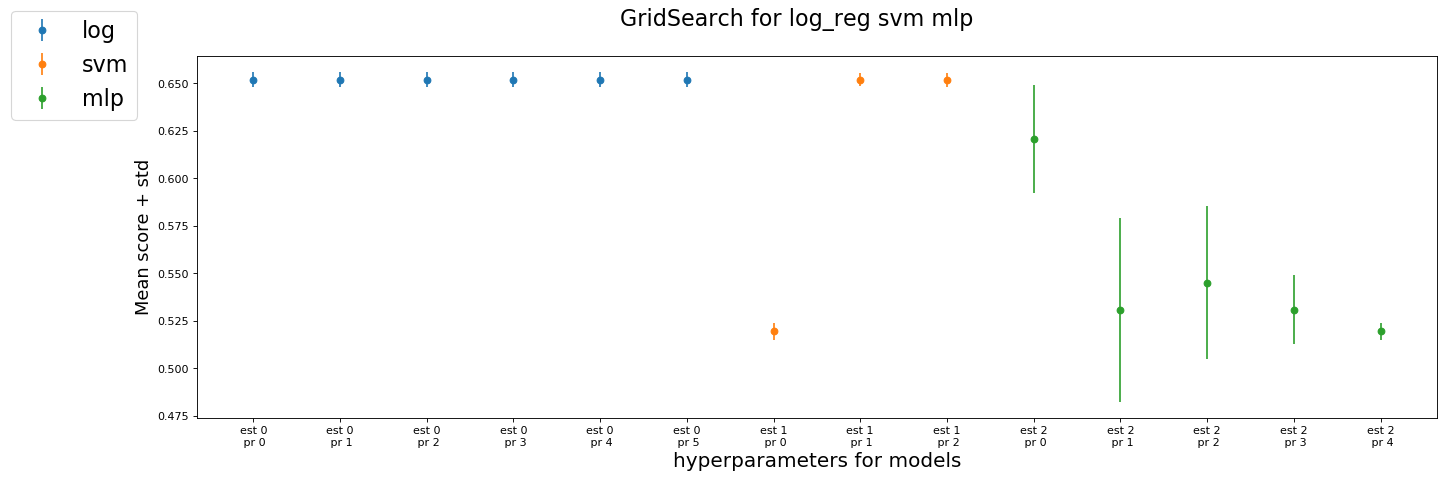

In [22]:
def make_labels(number, estimator):
    return list('est ' + str(estimator) + '\n pr ' + str(i) for i in range(number))

    
from matplotlib.pyplot import figure
    
def show_hyper_parameters_new(title, grids):
    fig = figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
    
    variations_of_parameters = 0
    for grid in grids:
        variations_of_parameters += len(grid.cv_results_['params'])
        
    ticks = list(range(variations_of_parameters))
    all_labels = []
    for i, grid in enumerate(grids):
        all_labels += make_labels(len(grid.cv_results_['params']), i)
    plt.xticks(ticks, all_labels)
    
    cur_len = 0
    p = [0] * len(grids)
    for i, grid in enumerate(grids):
        y = np.array(grid.cv_results_['mean_test_score']) 
        e = np.array(grid.cv_results_['std_test_score'])
        p[i] = plt.errorbar(range(cur_len, cur_len + len(grid.cv_results_['params'])), y, e, linestyle='None', marker='o')
        cur_len += len(grid.cv_results_['params'])

    fig.suptitle(title, fontsize=20)
    plt.xlabel('hyperparameters for models', fontsize=18)
    plt.ylabel('Mean score + std', fontsize=16)
    fig.legend((i for i in p), ('log', 'svm', 'mlp'), loc=2, prop={'size': 20})
    plt.show()

show_hyper_parameters_new('GridSearch for log_reg svm mlp', [log_reg_grid, svm_grid, mlpclassfier_grid])

Наибольшее среднее значение качества получилось у лог регрессии и свм-а, а наибольший доверительный интервал у MLP

При обучении алгоритмов стоит обращать внимание не только на их качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это могло повлиять на качество, давайте посмотрим на значения самих признаков.

**Задание 4** (1 балл) 

Посмотрите на значения признаков по gold и lh. В чем заключается особенность данных? На какие из рассматриваемых алгоритмов это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов?

In [12]:
import seaborn as sns
X_train.head()

,gold_team_radiant,gold_team_dire,max_gold_team_radiant,max_gold_team_dire,lh_team_radiant,lh_team_dire
0,21454,22095,5755,6384,148,192
1,22165,24536,5760,7659,157,144
2,21392,15548,8581,5130,174,99
3,18038,17484,5154,4458,143,101
4,16017,22041,4264,5389,96,145


Буду смотреть сразу для агрегаты. Для изначальных данных я посмотрел, но ничего того, чего нет на агрегатах не увидел.

(24974, 6)


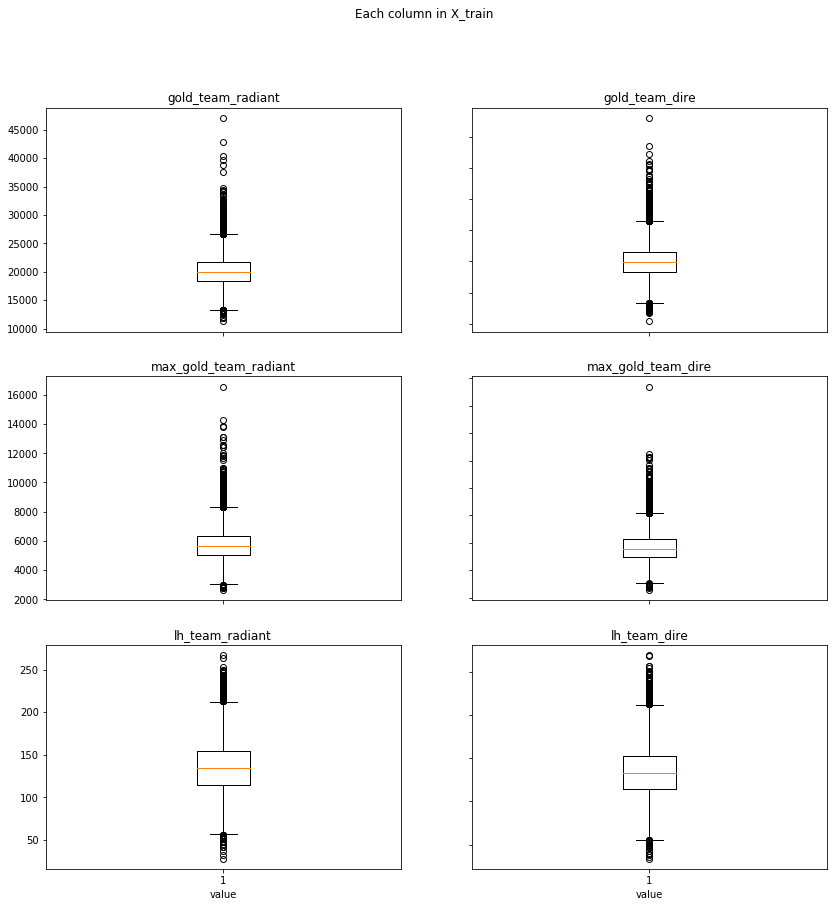

In [13]:
print(X_train.shape)
outliers_checker, axs = plt.subplots(len(X_train.columns) // 2, 2, figsize = (14, 14))
outliers_checker.suptitle('Each column in X_train')
for i, col in enumerate(X_train.columns):
    axs[i // 2][i % 2].boxplot(X_train[col])
    axs[i // 2][i % 2].set_title(col)
for ax in axs.flat:
    ax.set(xlabel='value')
for ax in axs.flat:
    ax.label_outer()    
   
plt.show()

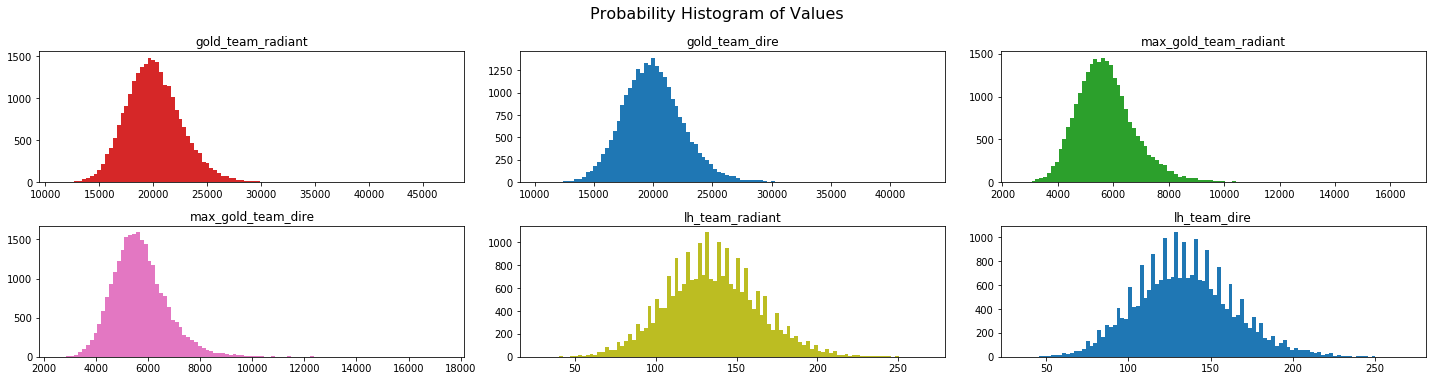

In [14]:
fig_hist, axes_hist = plt.subplots(2, 3, figsize=(20, 5))
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive', 'tab:blue']
n_bins = 20

for i, col in enumerate(X_train.columns):   
    axes_hist[i // 3][i % 3].hist(X_train[col], bins=100, label=str(col), color=colors[i])
    axes_hist[i // 3][i % 3].set_title(col)

plt.suptitle('Probability Histogram of Values', y=1.05, size=16)
plt.tight_layout();

### Поиск выбросов

Сделал некотору проверку на выбросы, т.к. они могут очень сильно помешать при масштабировании, особенно если данные ну уж сооовсем неадекватные (при вводе человек добавил лишних пару нулей к примеру, или ещё что :) )

На самом деле данные реальны, но видно, что одна игра выделяется среди всех, не то, чтобы очень сильно, но на графиках для 25000 игр она единственная такая, где игроки успели столько золота заработать (есть подозрение что адекватная такая игра невозможна, т.к. чтобы к 10 минутам заработать столько голды нужно чтобы все герои убивали своих крипов и потом сразу же умирали друг для друга, и при том чтобы так делали все из обоих команд на протяжении всех 10 минут! может я конечно и ошибаюсь, но если найти сколько голды получаешь за крипов и убийство, и как часто появляются крипы, плюс время на рес и т.д., то легко можно было бы найти те игры где происходило что-то совсем непонятное, и не характерное для нормальной игры, и возможно у нас такие есть и такие данные об играх)

### Как данные влияют на алгоритмы и стоит ли их масштабировать

Для одних фич значения между первым и третьим квартилем лежат в диапазоне 18000-22000, а для других в 120-160, что может повлиять на работу наших алгоритмов. У всех данных распределение нормальное.

Logistic_regression - для оптимизации мы используем градиентный спуск (значение градиента! а не просто его знак как в некоторых нейронках), а в шаге градинтного спуска при подсчётах мы учитываем какие значения у наших данных. Если данные не отмаштабированны, то может возникнуть такая фича с огромным значением, что она будет доминировать в влиянии на градиент некоторое количество шагов, а если мы отмаштабируем данные, то весы для всех фич будут сразу настраиваться вместе на более менее похожей скорости, что значительно ускорит схождение алгоритма. А ещё важно от чего мы считаем градиент, Как ты Витя говорил, если у нас функция активации - сигмоида, то производная для большого значения будет равна примерно 0, и в итоге наше обучение вообще будет стоять на месте в некоторых местах. Так что для этих двух алгоритмов масштабирование не влияет на качество ответа, но влияет на процесс обучения (ну и конечно такие моменты, когда у нас не сходится алгоритм из-за значений данных, то тут и на ответ повлияет, как никак шагов же ограниченное количество, или нашли локальный оптимум и не можем из него выбраться, но лог регрессия всё же легче переживает немасштабированные в отличие от MLP, и ниже это будет видно).

SVM - тут для нас величины вообще очень важны, т.к. в алгоритме мы смотрим на расстояние между точками. "важность" фичи будет сильно зависеть от её значения, поэтому если данные неотмасштабированны, то на результат алгоритма значительно сильнее будет влиять та фича, у которой просто больше значения, а мы явно такого не хотим. Тут масштабирование влияет на точность.

MLPClassifier - по сути то же, что сказано и для лог регрессии, и про локальный оптимум, и про угасание и взрыв градиента, очень нужно масштабирование данных.

Документация, это касается SVM с rbf ядром, поэтому фича с большей дисперсией не даёт модели учиться на фичах с меньшей дисперсией:
https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

Так же ещё из одного источника нашёл про NN, что нормализация может ускорить обучение, как я понимаю MLPClassifier это касается?:
If you have a neural network and just apply an affine transformation to your data, the network does not lose or gain anything in theory. In practice, however, a neural network works best if the inputs are centered and white. That means that their covariance is diagonal and the mean is the zero vector. Why does it improve things? It is only because the optimisation of the neural net works more gracefully, since the hidden activation functions don't saturate that fast and thus do not give you near zero gradients early on in learning.

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 

**Задание 5** (1.5 балла) 

Отмасштабируйте все вещественные признаки одним из указанных выше способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

Изменилось ли качество алгоритмов и почему?

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [720]:
log_reg_parameters = {'est__C':[0.0001, 0.1, 1, 10, 100, 10000]}

log_reg_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('est', LogisticRegression())
])

log_reg_grid_std_scaler = GridSearchCV(log_reg_pipe, log_reg_parameters, verbose = 10, n_jobs=-1, cv=KFold())
log_reg_grid_std_scaler.fit(X_train, y_train)
print()

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1969s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1131s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s


[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished


In [721]:
mlpclassfier_parameters = {'est__hidden_layer_sizes': [(50,50,50), (50,10), (100,), (10,), (1,)]}

# mlpclassfier_parameters = {'est__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (150,), (200,)]}

mlp_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('est', MLPClassifier())
])
mlpclassfier_grid_std_scaler = GridSearchCV(mlp_pipe, mlpclassfier_parameters, verbose = 10, n_jobs=-1, cv=KFold())
mlpclassfier_grid_std_scaler.fit(X_train, y_train)
print()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  1.7min remaining:   19.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('est',
                                        MLPClassifier(activation='relu',
                                                      alpha=0.0001,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=False,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(100,),
                               

In [734]:
svm_parameters = {'est__C':[0.001, 1, 100]}

svm_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('est', sklearn.svm.SVC())
])

svm_grid_std_scaler = GridSearchCV(svm_pipe, svm_parameters, verbose = 10, n_jobs=-1, cv=KFold())
svm_grid_std_scaler.fit(X_train, y_train)
print()

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/elephant/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  1.2min remaining:   35.5s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  3.1min remaining:   45.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.1min finished


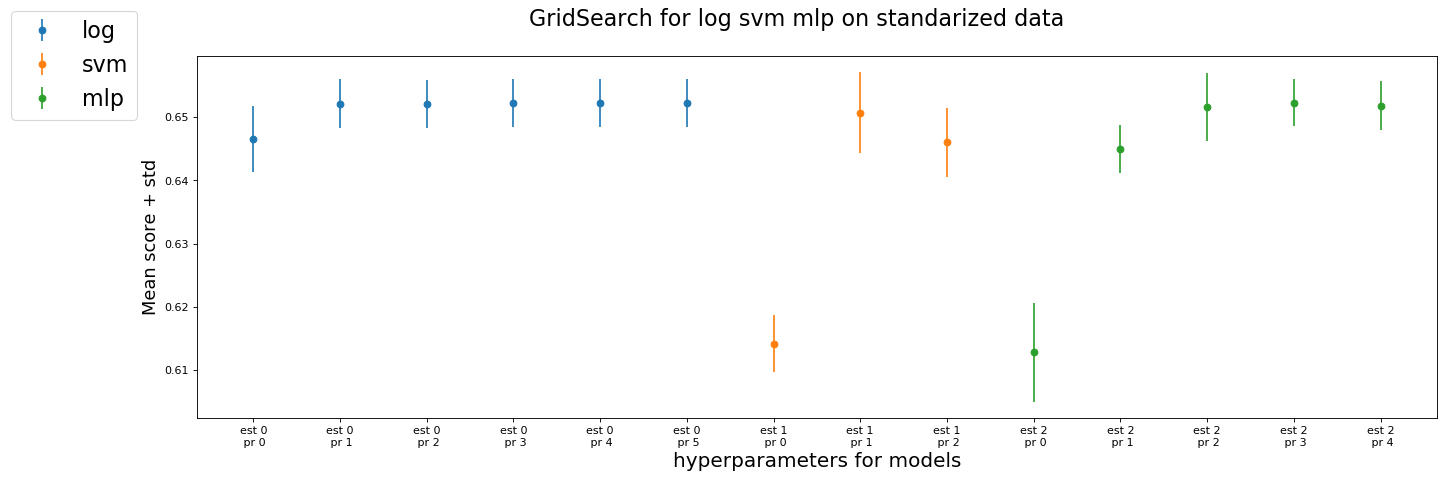

In [735]:
show_hyper_parameters_new('GridSearch for log svm mlp on standarized data', [log_reg_grid_std_scaler, svm_grid_std_scaler, mlpclassfier_grid_std_scaler])

In [28]:
log_reg_parameters = {'est__C':[0.0001, 0.1, 1, 10, 100, 10000]}
mlpclassfier_parameters = {'est__hidden_layer_sizes': [(50,50,50), (50,10), (100,), (10,), (1,)]}
svm_parameters = {'est__C':[0.001, 1, 100]}

log_reg_pipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('est', LogisticRegression())
])

svm_pipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('est', sklearn.svm.SVC())
])

mlp_pipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('est', MLPClassifier())
])

log_reg_grid_minmax = GridSearchCV(log_reg_pipe, log_reg_parameters, verbose = 10, n_jobs=-1, cv=KFold())
log_reg_grid_minmax.fit(X_train, y_train)
svm_grid_minmax = GridSearchCV(svm_pipe, svm_parameters, verbose = 10, n_jobs=-1, cv=KFold())
svm_grid_minmax.fit(X_train, y_train)
mlpclassfier_grid_minmax = GridSearchCV(mlp_pipe, mlpclassfier_parameters, verbose = 10, n_jobs=-1, cv=KFold())
mlpclassfier_grid_minmax.fit(X_train, y_train)
print()

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1814s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  1.0min remaining:   31.4s
/home/elephant/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  2.1min remaining:   31.4s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.7min finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:   24.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   27.6s finished


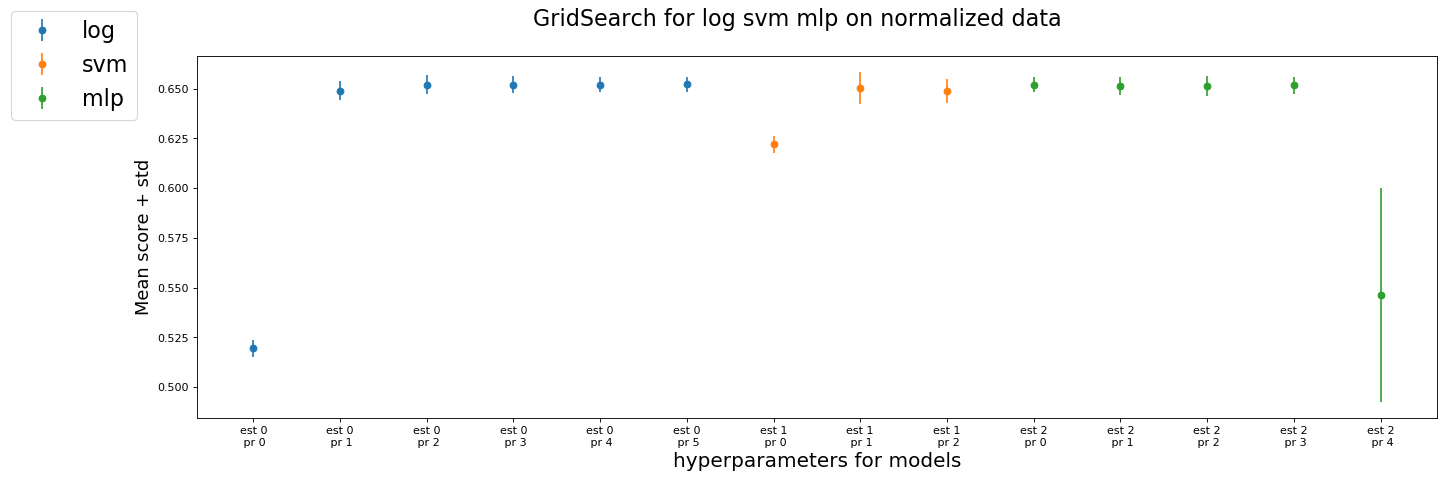

In [29]:
show_hyper_parameters_new('GridSearch for log svm mlp on normalized data', [log_reg_grid_minmax, svm_grid_minmax, mlpclassfier_grid_minmax])

Качество работы для лог регресси не изменилось, хотя вот при нормализации с одним набором параметров оно то ли не успело сойтись до конца из-за ограничения шагов, ведь качество упало, но только для одного набора. Так же немало рассказано в прошлом пункте.

Качество SVM сильно выросло, особенно для первого набора гиперпараметров, примерно на +0.1. Выше подробно описывал собственно с чем это связано.

MLP качество тоже сильно выросло. Интерсно так, что в общем все наборы параметров одинаковый результат прмиерно показывают, но есть один набор для стандаризации который не очень подходит, и для нормализации, и наборы параметров разные. Возможно в этот раз было меньше угасания и взрывов градиента, и мы не остались в локальном оптимуме.

**Задание 6** (2 балла) 

Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма. Какие гиперпараметры вы настраивали? Удалось ли улучшить качество алгоритмов?

In [30]:
log_reg_final_hyperparameters = {'est__C':[0.0001, 0.1, 1, 10, 100, 10000],
                      'est__solver':['newton-cg', 'lbfgs', 'liblinear']}

log_reg_pipe_final_hyperparameters = Pipeline([
    ('scale', StandardScaler()),
    ('est', LogisticRegression())
])

log_reg_grid_final = GridSearchCV(log_reg_pipe_final_hyperparameters, log_reg_final_hyperparameters, verbose = 10, n_jobs=-1, cv=KFold())
log_reg_grid_final.fit(X_train, y_train)
print()

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0872s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1191s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.5s finished


In [31]:
mlpclassfier_final_hyperparameters = {'est__hidden_layer_sizes': [(10,30,10),(20,), (50), (100,), (100,50)],
    'est__activation': ['logistic', 'tanh', 'relu'],
    'est__solver': ['sgd', 'adam'],
    'est__alpha': [0.00001, 0.0001, 0.05],}

mlp_pipe_final_hyperparameters = Pipeline([
    ('scale', StandardScaler()),
    ('est', MLPClassifier())
])

mlpclassfier_grid_final = GridSearchCV(mlp_pipe_final_hyperparameters, mlpclassfier_final_hyperparameters, verbose = 10, n_jobs=-1, cv=KFold())
mlpclassfier_grid_final.fit(X_train, y_train)
print()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.6min
[Paralle

In [34]:
svm_final_hyperparameters = {'est__C': [0.001, 10, 100],  
              'est__gamma': [0.001, 1, 100], 
                    }

svm_pipe_final_hyperparameters = Pipeline([
    ('scale', StandardScaler()),
    ('est', sklearn.svm.SVC())
])

svm_grid_final = GridSearchCV(svm_pipe_final_hyperparameters, svm_final_hyperparameters, verbose = 10, n_jobs=-1, cv=KFold())
svm_grid_final.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.9min
/home/elephant/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed: 15.9min remaining:   44.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 16.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('est',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinki

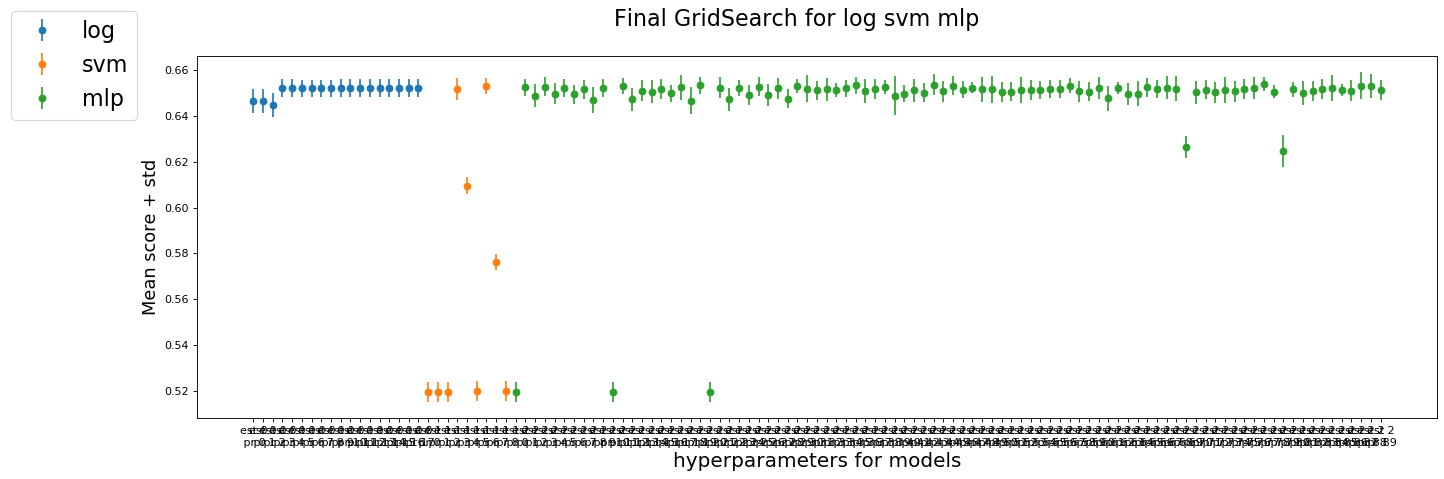

In [35]:
show_hyper_parameters_new('Final Gr1idSearch for log svm mlp', [log_reg_grid_final, svm_grid_final, mlpclassfier_grid_final])

In [37]:
for grid in [log_reg_grid_final, svm_grid_final, mlpclassfier_grid_final]:
    idx = grid.best_index_
    print("mean %0.3f std (+/-%0.03f) for %r" % (grid.cv_results_['mean_test_score'][idx],
                                                     grid.cv_results_['std_test_score'][idx],
                                                     grid.cv_results_['params'][idx]))

mean 0.652 std (+/-0.004) for {'est__C': 100, 'est__solver': 'newton-cg'}
mean 0.653 std (+/-0.004) for {'est__C': 100, 'est__gamma': 0.001}
mean 0.654 std (+/-0.003) for {'est__activation': 'relu', 'est__alpha': 0.0001, 'est__hidden_layer_sizes': (100,), 'est__solver': 'adam'}


В каждом блоке кода хорошо виден набор параметров, качество улучшить получилось, правда ненамного, mlp на 0.001, а log reg ещё меньше.

### Добавление категориальных признаков в модели

**Задание 7** (1.5 балла) 

Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?
* Для каких целей можно использовать знание качества на обучающей части выборки?
* Какой из алгоритмов лучше обучается на меньшем числе объектов?
* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?

In [23]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [22]:
mlp_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('est', MLPClassifier(alpha = 0.0001, hidden_layer_sizes = (100,)))
])

log_reg_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('est', LogisticRegression(C = 100, solver = 'newton-cg'))
])

Код для функции ниже взят из документации sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

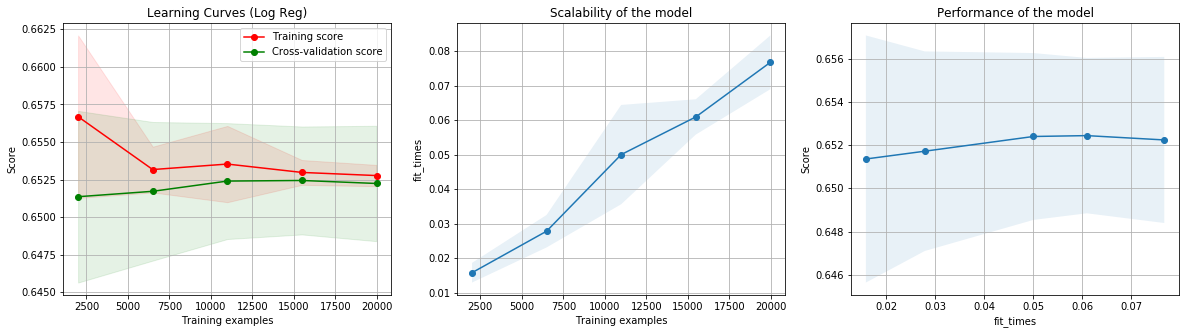

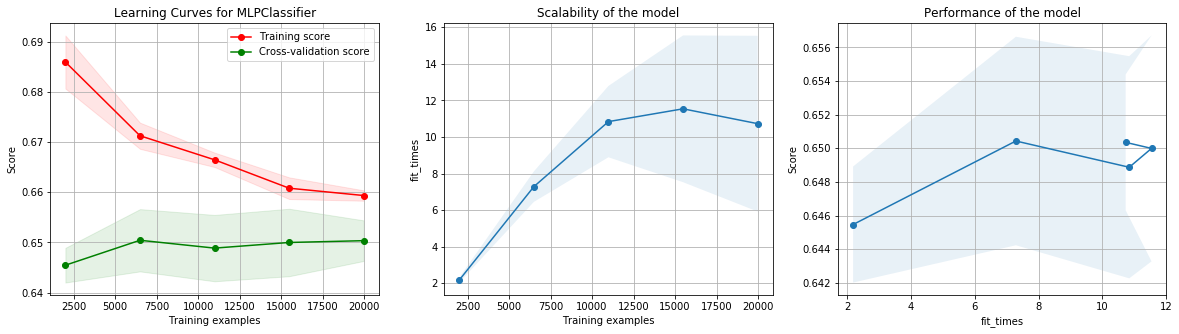

In [35]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


# fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Log Reg)"

plot_learning_curve(log_reg_pipe, title, X_train, y_train, cv=KFold(), n_jobs=-1)

#title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
title = "Learning Curves for MLPClassifier"

plot_learning_curve(mlp_pipe, title, X_train, y_train, cv=KFold(), n_jobs=-1)

plt.show()

После выполнения данного блока вы получите решение, которое можно отправить в соревнование на [kaggle](https://www.kaggle.com/t/f2f20fc510f042dfa9751a03c6108805). 

Будьте внимательными, для части матчей из test.csv отсутствуют некоторые данные, для этих матчей все равно требуется что-то предсказать.

1. Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?

Может и там и там, качество на тестовой выборке может падать например с переобучением на обучающей, а на обучающей может падать если добавлять выбросы, они ещё более чувствительны в начале. Или например при классификации на обучающей в начале идёт ооооочень много сэмплов одного вида собак, а потом даётся одна фотка похожего вида, и тогда качество должно упасть.

2. Для каких целей можно использовать знание качества на обучающей части выборки?

Иметь некоторое представление, может ли быть переобучена модель, особенно сравнивая с результатами на тестовых данных. И в некоторых случаях можно понять насколько репрезентативна обучающая выборка.

3. Какой из алгоритмов лучше обучается на меньшем числе объектов?

В нашем случае logistic regression обучилась лучше на меньшем числе объектов.

4. Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?

Добавление новых алгоритмов может повысить качество работы. Алгоритмы далеко не насыщены, у нас что-то около 25000 тысяч сэмплов, и только 6 параметров. И зная то с чем мы работаем такие данные как опыт и события (events.csv) ОЧЕНЬ сильно влияют на происходящее. Скажем так, по сути, у нас хоть и 6 фич, они реально показывают по большей части только один аттрибут, это разница по голде между командами, по которой мы +- определяем результат игры, но на самом деле имея даже гигантское отставание по голде, команды, собравшая ивент может запросто выиграть игру, и есть ещё множество фич, которые влияют на результат. 

P.S. Голда и опыт имеют разное распределние в игре, в отличии от lh и gold, эти два почти всегда идут рука об руку.

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**Задание 8** (1.5 балла) 

Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn). Это задание предлагается делать с использованием *heroes.csv*. Представьте каждую из команд в виде one-hot-encoded вектора с пятью единицами и остальными нулями.

In [120]:
heroes = pd.read_csv("heroes.csv")
heroes.head()

,mid,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,91,42,87,15,65,11,6,34,69,74
1,1,69,85,71,24,64,74,68,39,65,11
2,2,17,40,31,67,99,32,7,72,48,104
3,3,80,43,101,71,94,69,70,98,24,39
4,4,25,15,75,29,95,3,32,55,64,86


In [121]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

In [122]:
all_heroes_from_table = np.array([])
for col in heroes.columns[1:]:
    all_heroes_from_table = np.concatenate([all_heroes_from_table, heroes[col].values]) 

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(all_heroes_from_table)
print(integer_encoded)
print(integer_encoded.shape)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
print(onehot_encoded.shape)

[91 69 17 ... 87 59 48]
(499480,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(499480, 111)


In [138]:
heroes['mid'].size

49948

In [139]:
# add radiant heroes as 111 feauters
for hero in range(111):
    col_name = 'radiant_hero_' + str(hero)
    new_feauters = [0] * 49948
    for i in range(49948):
        for j in range(i, 499480 // 2, 49948):
            if onehot_encoded[j][hero]:
                new_feauters[i] = 1
    heroes[col_name] = new_feauters

In [141]:
# same for dire
for hero in range(111):
    col_name = 'dire_hero_' + str(hero)
    new_feauters = [0] * 49948
    for i in range(49948):
        for j in range(499480 // 2 + i, 499480, 49948):
            if onehot_encoded[j][hero]:
                new_feauters[i] = 1
    heroes[col_name] = new_feauters

In [142]:
heroes.head()

,mid,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,...,dire_hero_101,dire_hero_102,dire_hero_103,dire_hero_104,dire_hero_105,dire_hero_106,dire_hero_107,dire_hero_108,dire_hero_109,dire_hero_110
0,0,91,42,87,15,65,11,6,34,69,...,0,0,0,0,0,0,0,0,0,0
1,1,69,85,71,24,64,74,68,39,65,...,0,0,0,0,0,0,0,0,0,0
2,2,17,40,31,67,99,32,7,72,48,...,0,0,0,1,0,0,0,0,0,0
3,3,80,43,101,71,94,69,70,98,24,...,0,0,0,0,0,0,0,0,0,0
4,4,25,15,75,29,95,3,32,55,64,...,0,0,0,0,0,0,0,0,0,0


In [144]:
heroes = heroes.drop(columns=heroes.columns[1:2])
heroes.head()

,mid,radiant_hero_0,radiant_hero_1,radiant_hero_2,radiant_hero_3,radiant_hero_4,radiant_hero_5,radiant_hero_6,radiant_hero_7,radiant_hero_8,...,dire_hero_101,dire_hero_102,dire_hero_103,dire_hero_104,dire_hero_105,dire_hero_106,dire_hero_107,dire_hero_108,dire_hero_109,dire_hero_110
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
X_train_for_categories = train_new_parameters
X_train_for_categories = X_train_for_categories.drop(columns=['radiant_won'])
X_train_for_categories.head()

,mid,gold_team_radiant,gold_team_dire,max_gold_team_radiant,max_gold_team_dire,lh_team_radiant,lh_team_dire
0,0,21454,22095,5755,6384,148,192
1,1,22165,24536,5760,7659,157,144
2,2,21392,15548,8581,5130,174,99
3,4,18038,17484,5154,4458,143,101
4,5,16017,22041,4264,5389,96,145


In [165]:
X_train_for_categories = X_train_for_categories.join(heroes.set_index('mid'), on='mid')
X_train_for_categories.head()

,mid,gold_team_radiant,gold_team_dire,max_gold_team_radiant,max_gold_team_dire,lh_team_radiant,lh_team_dire,radiant_hero_0,radiant_hero_1,radiant_hero_2,...,dire_hero_101,dire_hero_102,dire_hero_103,dire_hero_104,dire_hero_105,dire_hero_106,dire_hero_107,dire_hero_108,dire_hero_109,dire_hero_110
0,0,21454,22095,5755,6384,148,192,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,22165,24536,5760,7659,157,144,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,21392,15548,8581,5130,174,99,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,18038,17484,5154,4458,143,101,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,16017,22041,4264,5389,96,145,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [166]:
X_train_for_categories = X_train_for_categories.drop(columns=['mid'])
X_train_for_categories.head()

,gold_team_radiant,gold_team_dire,max_gold_team_radiant,max_gold_team_dire,lh_team_radiant,lh_team_dire,radiant_hero_0,radiant_hero_1,radiant_hero_2,radiant_hero_3,...,dire_hero_101,dire_hero_102,dire_hero_103,dire_hero_104,dire_hero_105,dire_hero_106,dire_hero_107,dire_hero_108,dire_hero_109,dire_hero_110
0,21454,22095,5755,6384,148,192,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22165,24536,5760,7659,157,144,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21392,15548,8581,5130,174,99,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,18038,17484,5154,4458,143,101,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16017,22041,4264,5389,96,145,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


После кодирования признаков получилось достаточно много и правильно будет заново подобрать оптимальные гиперпараметры для моделей. 

**Задание 9** (1.5 балла)

Добавьте к масштабированным вещественным признакам закодированные категориальные и подберите гиперпараметры заново. Дало ли добавление новых признаков прирост качества? Измеряйте качество, как и раньше, используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

One-hot encoding значительно увеличил количество входных данных. 

Как изменилось количество параметров у моделей? Наблюдается ли переобучение?

In [167]:
log_reg_categ = {'est__C':[0.0001, 0.1, 1, 10, 100, 10000],
                      'est__solver':['newton-cg', 'lbfgs', 'liblinear']}

log_reg_pipe_categ = Pipeline([
    ('scale', StandardScaler()),
    ('est', LogisticRegression())
])

log_reg_grid_categ = GridSearchCV(log_reg_pipe_categ, log_reg_categ, verbose = 10, n_jobs=-1, cv=KFold())
log_reg_grid_categ.fit(X_train_for_categories, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   29.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('est',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                              

In [170]:
mlpclassfier_final_categ = {'est__hidden_layer_sizes': [(10,10,), (10,), (100,30,10)],
    'est__alpha': [0.00001, 0.0001, 0.05],}

mlp_pipe_categ = Pipeline([
    ('scale', StandardScaler()),
    ('est', MLPClassifier())
])

mlpclassfier_grid_categ = GridSearchCV(mlp_pipe_categ, mlpclassfier_final_categ, verbose = 10, n_jobs=-1, cv=KFold())
mlpclassfier_grid_categ.fit(X_train_for_categories, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:  4.5min remaining:   12.7s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.7min finished
/home/elephant/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('est',
                                        MLPClassifier(activation='relu',
                                                      alpha=0.0001,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=False,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(100,),
                               

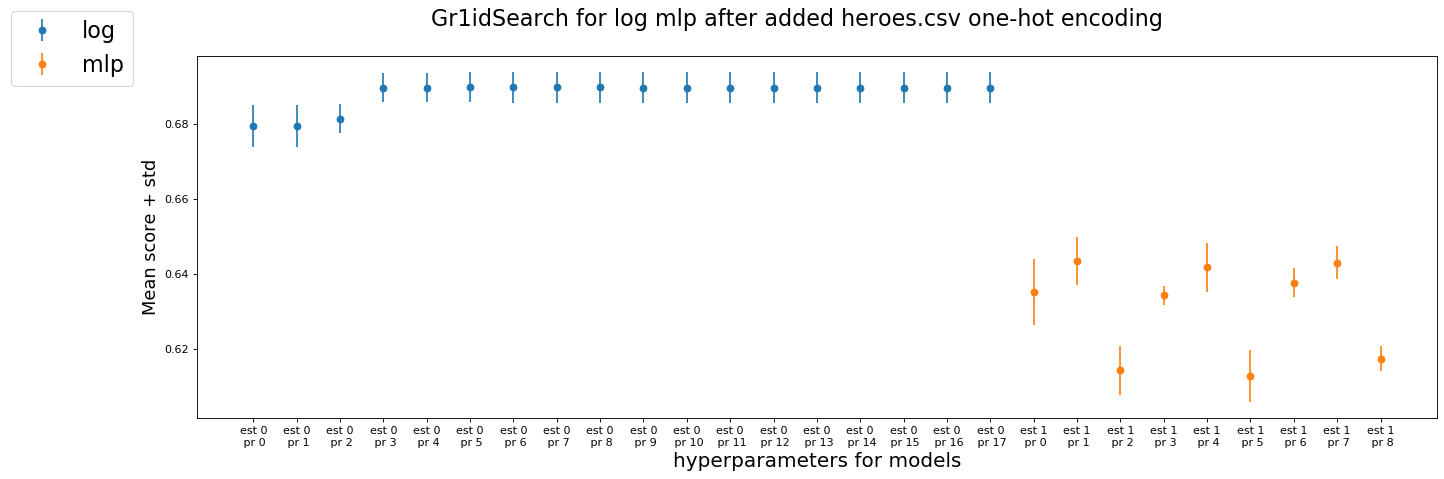

In [172]:
def make_labels(number, estimator):
    return list('est ' + str(estimator) + '\n pr ' + str(i) for i in range(number))

    
from matplotlib.pyplot import figure
    
def show_hyper_parameters_new(title, grids):
    fig = figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
    
    variations_of_parameters = 0
    for grid in grids:
        variations_of_parameters += len(grid.cv_results_['params'])
        
    ticks = list(range(variations_of_parameters))
    all_labels = []
    for i, grid in enumerate(grids):
        all_labels += make_labels(len(grid.cv_results_['params']), i)
    plt.xticks(ticks, all_labels)
    
    cur_len = 0
    p = [0] * len(grids)
    for i, grid in enumerate(grids):
        y = np.array(grid.cv_results_['mean_test_score']) 
        e = np.array(grid.cv_results_['std_test_score'])
        p[i] = plt.errorbar(range(cur_len, cur_len + len(grid.cv_results_['params'])), y, e, linestyle='None', marker='o')
        cur_len += len(grid.cv_results_['params'])

    fig.suptitle(title, fontsize=20)
    plt.xlabel('hyperparameters for models', fontsize=18)
    plt.ylabel('Mean score + std', fontsize=16)
    fig.legend((i for i in p), ('log', 'mlp'), loc=2, prop={'size': 20})
    plt.show()

show_hyper_parameters_new('Gr1idSearch for log mlp after added heroes.csv one-hot encoding', [log_reg_grid_categ, mlpclassfier_grid_categ])

In [173]:
for grid in [log_reg_grid_categ, mlpclassfier_grid_categ]:
    idx = grid.best_index_
    print("mean %0.3f std (+/-%0.03f) for %r" % (grid.cv_results_['mean_test_score'][idx],
                                                     grid.cv_results_['std_test_score'][idx],
                                                     grid.cv_results_['params'][idx]))

mean 0.690 std (+/-0.004) for {'est__C': 1, 'est__solver': 'newton-cg'}
mean 0.643 std (+/-0.006) for {'est__alpha': 1e-05, 'est__hidden_layer_sizes': (10,)}


1. Дало ли добавление новых признаков прирост качества? 

Да! Для logistic reg

2. Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

Да! log reg сильно выбился вперёд

3. Как изменилось количество параметров у моделей? 

log_reg получила + 222 фичи
у mlp мы сами кол-во нейронов определяем, а входные тоже + 222

4. Наблюдается ли переобучение?

mlp переобучилось, снизу видно

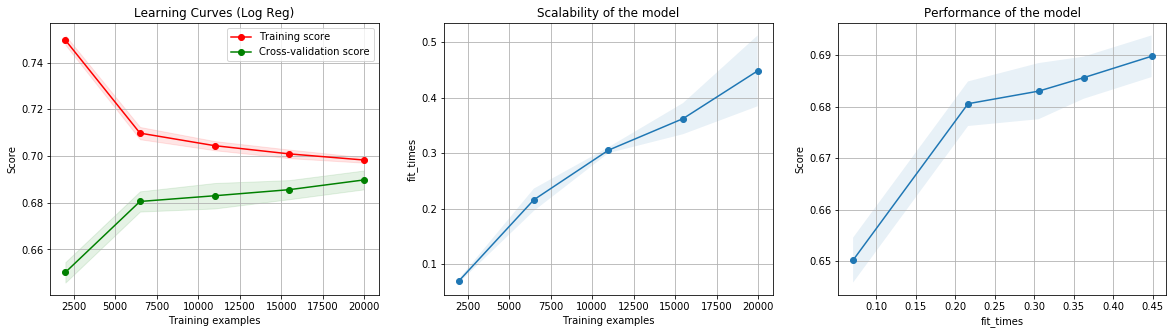

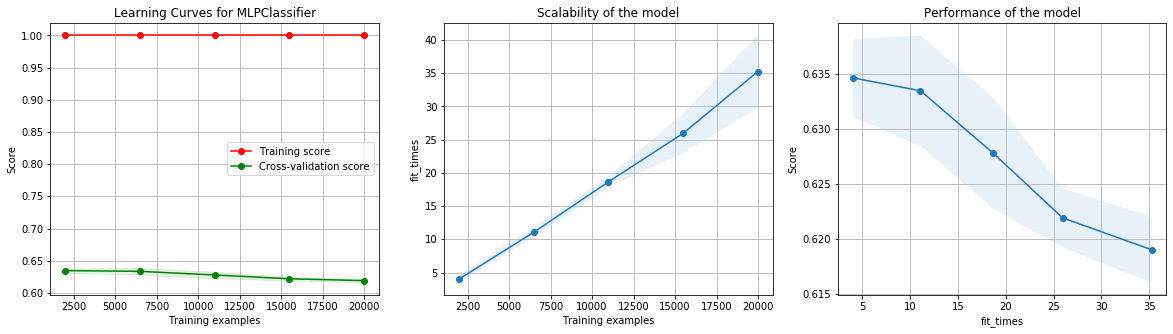

In [174]:
title = "Learning Curves (Log Reg)"

plot_learning_curve(log_reg_pipe_categ, title, X_train_for_categories, y_train, cv=KFold(), n_jobs=-1)

title = "Learning Curves for MLPClassifier"

plot_learning_curve(mlp_pipe_categ, title, X_train_for_categories, y_train, cv=KFold(), n_jobs=-1)

plt.show()

### Смешивание моделей (blending)

Часто на практике оказывается возможным увеличить качество предсказания путем смешивания разных моделей. Давайте посмотрим, действительно ли такой подход дает прирост в качестве.

Выберите из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**Задание 10** (3 балла)

При реализации своих моделей хорошей практикой является создание sklearn-совместимых классов. Во-первых, такая реализация будет иметь стандартный интерфейс и позволит другим людям безболезненно обучать реализованные вами модели. Во-вторых, появляется возможность использовать любой функционал пакета sklearn, принимающий на вход модель.

Создайте классификатор, который инициализируется двумя произвольными классификаторами и параметром $\alpha$. Во время обучения такой классификатор должен обучать обе базовые модели, а на этапе предсказания замешивать предсказания базовых моделей по формуле, указанной выше. 

Для создания пользовательского классификатора необходимо отнаследоваться от базовых классов *[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* и реализовать методы *\_\_init\_\_, fit, predict и predict_proba*. Пример sklearn-совместимого классификатора с комментариями можно найти [здесь](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator) 

**Задание 11** (1.5 балла)

Подберите по сетке от 0 до 1 значение $\alpha$ для этого классификатора. Если класс реализован правильно, то вы cможете использовать *GridSearchCV*, как в случае с обычными классификаторами.

Изобразите на графике среднее качество по фолдам и доверительный интервал в зависимости от $\alpha$.

Дал ли этот подход прирост к качеству по сравнению с моделями, обученными по-отдельности? Поясните, почему даже простой блендинг моделей может влять на итоговое качество?

### Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей, правильным продолжением является сравнение их между собой.  Воспользуйтесь диаграммой размаха ("ящик с усами") для сравнения алгоритмов между собой. Эту диаграмму можно построить при помощи [boxplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) из matplotlib либо через [обертку](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) над ней из pandas.

**Задание 12** (3 балла) 

Для каждого типа классификатора, а так же смешанной модели, выберите тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

Не забудьте продолжить участвовать в соревнование, воспользовавшись всеми полученными наработками.